------

# **Project Name**    - 

# Uber Supply Demand Gap EDA Project

----------

### **Project Type**    - EDA
### **Contribution**    - Individual
###  Name  -  Neha Vishwakarma

-------------

### **Project Summary -**

Uber Technologies, Inc. is an American multinational transportation company that provides ride-hailing services, courier services, food delivery, and freight transport. It is headquartered in San Francisco, California, and operates in approximately 70 countries and 15000 cities worldwide. It is the largest ridesharing company worldwide with over 150 million monthly active users and 6 million active drivers and countries. It coordinates an average of 28 million trips per day, and has coordinated 47 billion trips since its inception in 2010. In 2023, the company has a take rate(revenue as a percentage of gross bookings) of 28.7% for mobility services and 18.3% for food delivery. We have given a dataset through which we have to analyse the demand and supply gap for Uber Company by doing EDA operation on given dataset.

### **GitHub Link -**

Provide your GitHub Link here.

### **Problem Statement**

We have given a dataset on which we have to do EDA operation to analyse and solve problem for the Uber Demand Gap through it.

### **Define Your Business Objective?**

#### The following are the business objective for this project:-

1. To find the reason of cancellation of cab rides by drivers.
2. To find the solution to increase the transparency of cab ride fairs.
3. To find the permanent solution to customer problems so that to increase customer engagement and customer statisfaction rate.
4. To find various method to increase engagement to use this app over other apps over other apps and ultimately increase profits for the organization.
5. To find solution to increase safety of cab rides specially in right time.

--------

# ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as snp
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#import plotly.express as plt
import random
import statsmodels as stat
import geopandas as geo
import missingno as ms              
from wordcloud import WordCloud

-----------

### Dataset Loading

In [ ]:
# Load Dataset   # md is the dataframe variable name where I'm storing my data.
md = pd.read_csv("E:/UBER SUPPLY DEMAND GAPS/Uber Request Data.csv")

--------------

### Dataset First View

In [3]:
# Dataset First Look

md.head(5)

Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed    11/07/16 11:51   
1         867      Airport        1.0  Trip Completed    11/07/16 17:57   
2        1807         City        1.0  Trip Completed     12/07/16 9:17   
3        2532      Airport        1.0  Trip Completed    12/07/16 21:08   
4        3112         City        1.0  Trip Completed     13/07/16 8:33   

   Drop timestamp  
0  11/07/16 13:00  
1  11/07/16 18:47  
2   12/07/16 9:58  
3  12/07/16 22:03  
4   13/07/16 9:25

In [4]:
md.tail(5)

Request id Pickup point  Driver id             Status Request timestamp  \
6740        6745         City        NaN  No Cars Available    15/07/16 23:49   
6741        6752      Airport        NaN  No Cars Available    15/07/16 23:50   
6742        6751         City        NaN  No Cars Available    15/07/16 23:52   
6743        6754         City        NaN  No Cars Available    15/07/16 23:54   
6744        6753      Airport        NaN  No Cars Available    15/07/16 23:55   

     Drop timestamp  
6740            NaN  
6741            NaN  
6742            NaN  
6743            NaN  
6744            NaN

------------

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

md.shape

(6745, 6)

------------

### Dataset Information

In [6]:
# Dataset Info

md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


------------

### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

# Check for duplicate values
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count= duplicates.value_counts()
print(duplicate_count)

False    6745
dtype: int64


-----------

### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

md.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

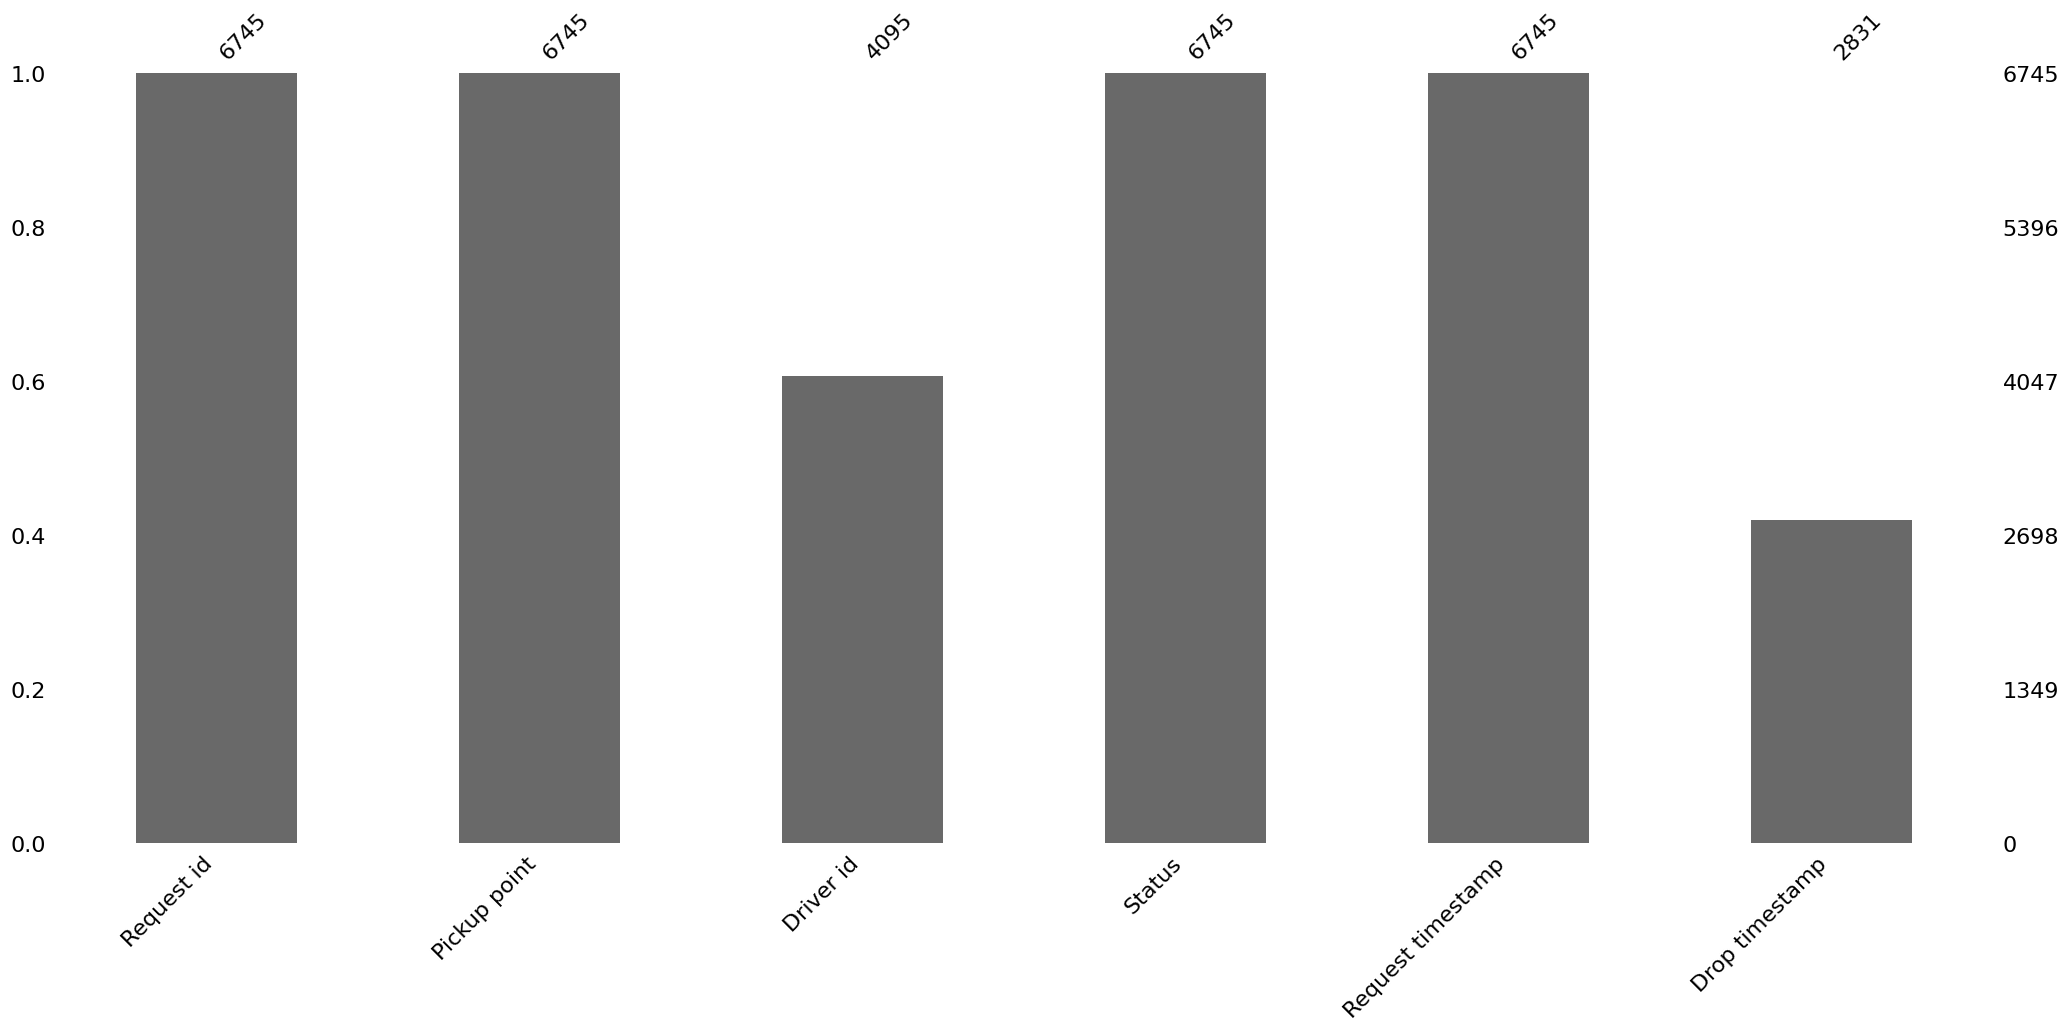

In [9]:
# Visualizing the missing values
# Missingno as ms is a library specially used to visualize the missing values like  bar plot, matrix plot, heatmap etc.

ms.bar(md)
plt.show()

-------------

### What did you know about your dataset?

The following are the major points about the dataset:-

1. The dataset contains 6 columns and 6745 rows.
2. There are no duplicate values in the dataset.

Following 2 columns are having some missing values:-

1. Driver id --- 2650
2. Drop timestamp --- 3914

-------------

# ***2. Understanding Your Variables***

###  Dataset Columns

In [10]:
# Dataset Columns

md.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

--------------

### Dataset Describe

In [11]:
# Dataset Describe

md.describe()

Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

----------

### Variables Description

#### Variables Description

The following are the variables with their description:-
    
Column names..................Description
1. Request id.................Customer Unique id who requested for the cap service through app.
2. Pickup point...............Pickup location to pickup the customer
3. Driver id.....................Unique if of driver who is driving the cap
4. Status........................Status of trip that if it got completed, cancelled or no cabs are available.
5. Request timestamp..........Request time and date when the sutomer requested for the cab service.
6. Drop timestamp.............Drop time and date when the customer is dropped to their respective location


The above are the description for the variables present in the dataset.

---------

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

for x in md.columns:
    print(f'{x} - {md[x].nunique()}')        # nunique--->unique

Request id - 6745
Pickup point - 2
Driver id - 300
Status - 3
Request timestamp - 4016
Drop timestamp - 2282


----------

# 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make the dataset analysis ready

# checking for missing values
md.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

------------

### Filling the null values/ handling the missing values

In [14]:
md.fillna({"Driver id": "Not available"}, inplace= True)

In [15]:
md.fillna({'Drop timestamp': "Not available"}, inplace= True)

----------

### Checking that the missing values are present or removed.

In [16]:
md.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

-----------

### What all manipulations have you done and insights you found?

The following  manipulation we have done to our dataset:-

1. As there were no duplicates so no issue of removing it.
2. There are total 2 columns having missing values which we replaced with Not Available value.

3. Driver id --> 2650
4. Drop timestamp --> 3914

--------------------

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

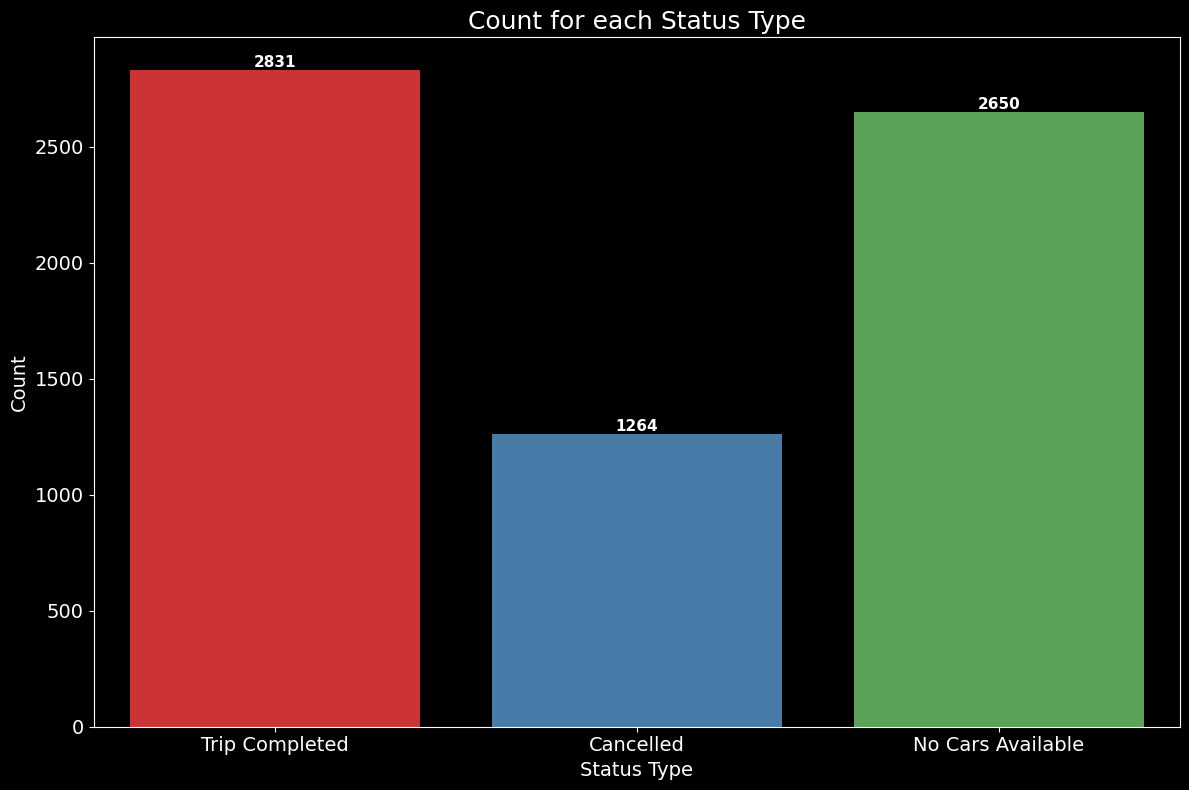

In [17]:
# Chart - 1 visualization code

# background style
plt.style.use('dark_background')

# remove any extra spaces in the columns
md.columns = md.columns.str.strip()

# increasing the figure/ graph size
plt.figure(figsize=(12,8))

# main plot using countplot
ax= sns.countplot(data= md, x= 'Status', palette='Set1')


# titles and labels
plt.title("Count for each Status Type", fontsize= 18)
plt.xlabel('Status Type', fontsize= 14)
plt.ylabel("Count", fontsize= 14)

#increasing the fontsize on x and y axis for better visibility
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# for writting count numbers above every bar we are running a loop on each bar
for p in ax.patches:
    count = int(p.get_height())          # keeping the bar height = count value
    x = p.get_x() + p.get_width() / 2     # calclating the center position of each text
    y= p.get_height()
    ax.annotate(            # for writting the count above the bars
        str(count),
        (x,y),
        ha= 'center',
        va= 'bottom',
        fontsize= 11,
        color= 'white',
        fontweight= 'bold'
    )
    
# final cleaning 
plt.grid(False)        # grid removed
plt.tight_layout()     # layout adjusted
plt.show()             # plot show

##### 1. Why did you pick the specific chart?

The above bar plot gives clear count for status type.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. Highest count is for Trip completed which 2831.
2. Second highest is No cars available status which is 2650.
3. Lowest count is for Cancelled status which is 1264.


##### 3. Will the gained insights help creating a positive business impact?   Are there any insights that lead to negative growth? Justify with specific reason.

1. The highest number of records belong to Trip Completed (about 2831), indicating that most ride requests are successfully fulfilled.
2. The number of cases where No Cars Were Available (around 2650) is also very high, suggesting a major supply shortage during certain time periods or locations.
3. The Cancelled trips count (approximately 1264) is significantly lower than the other two categories but still represents a noticeable portion of total requests.
4. The high number of “No Cars Available” cases highlights a potential area for improvement in driver allocation and demand forecasting.
5. Overall, while Uber is completing a large number of trips, the high unfulfilled demand indicates missed revenue and customer experience challenges.
6. Uber can reduce “No Cars Available” cases by implementing an accurate demand forecasting system using historical trip data to predict high-demand times and locations, allowing better driver allocation and improved ride availability.

-------------

#### Chart - 2

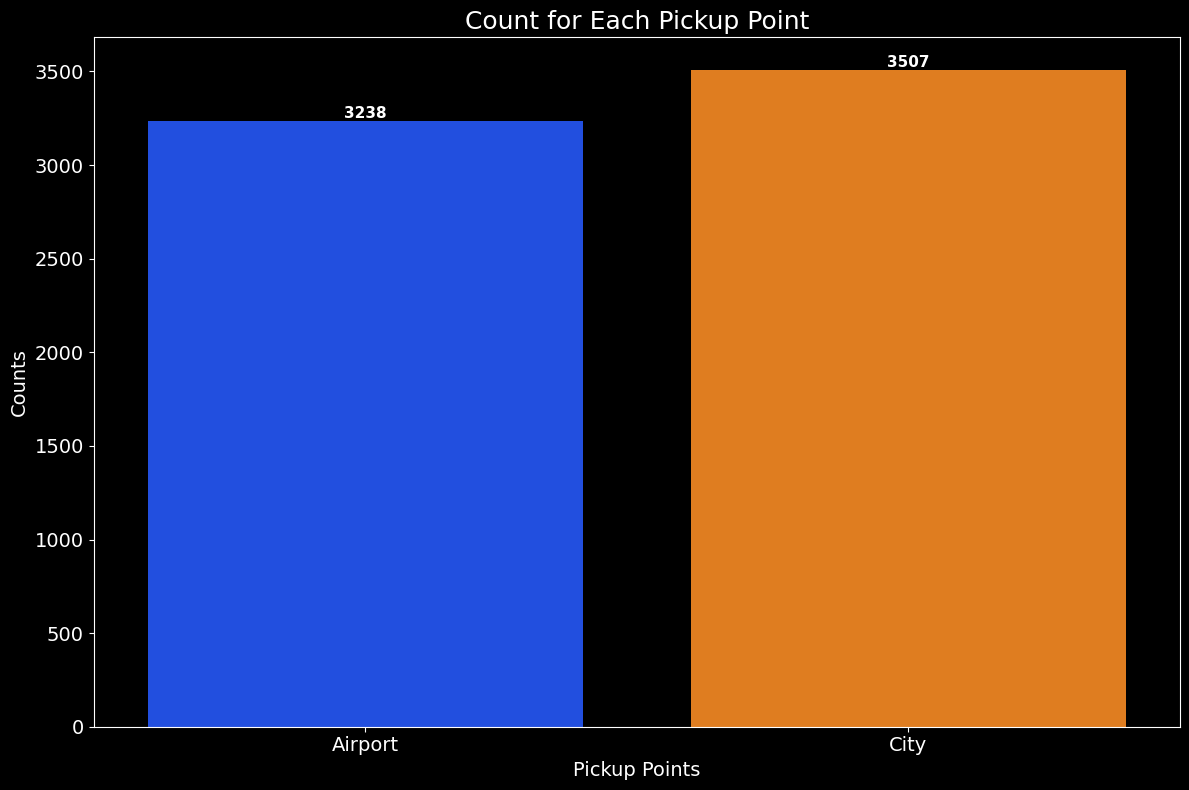

In [18]:
# Chart - 2 visualization code

plt.style.use('dark_background')
md.columns= md.columns.str.strip()
plt.figure(figsize=(12,8))

ax=sns.countplot(data=md, x= 'Pickup point', palette='bright')
plt.title("Count for Each Pickup Point", fontsize= 18)
plt.xlabel("Pickup Points", fontsize= 14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for p in ax.patches:
    count= int(p.get_height())
    x= p.get_x() + p.get_width() / 2
    y= p.get_height()
    
    ax.annotate(
        str(count),
        (x,y),
        ha="center",
        va="bottom",
        fontsize= 11,
        color="white",
        fontweight='bold'
    )
    
plt.grid(False)
plt.tight_layout()
plt.show()

# 1. Why did you pick the specific chart?

The above bar plot gives clear count for pickup points.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot-
1. Highest counts is for city pickup which has the count as 3507.
2. Lowest count is for airport pickup point which is 3238.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1. The total number of requests from the City pickup point (about 3507) is higher than the Airport pickup point (about 3238).
2. This indicates that overall ride demand is slightly higher within city areas compared to airport locations.
3. The difference between city and airport counts is not extremely large, which shows that both pickup points are major contributors to total ride demand.
4. The strong demand at both pickup points suggests Uber services are equally important for daily urban travel and airport transportation.
5. Uber can improve service efficiency by using demand forecasting to ensure balanced driver availability across both city and airport pickup locations, especially during peak demand hours.

-------------

#### Chart - 3

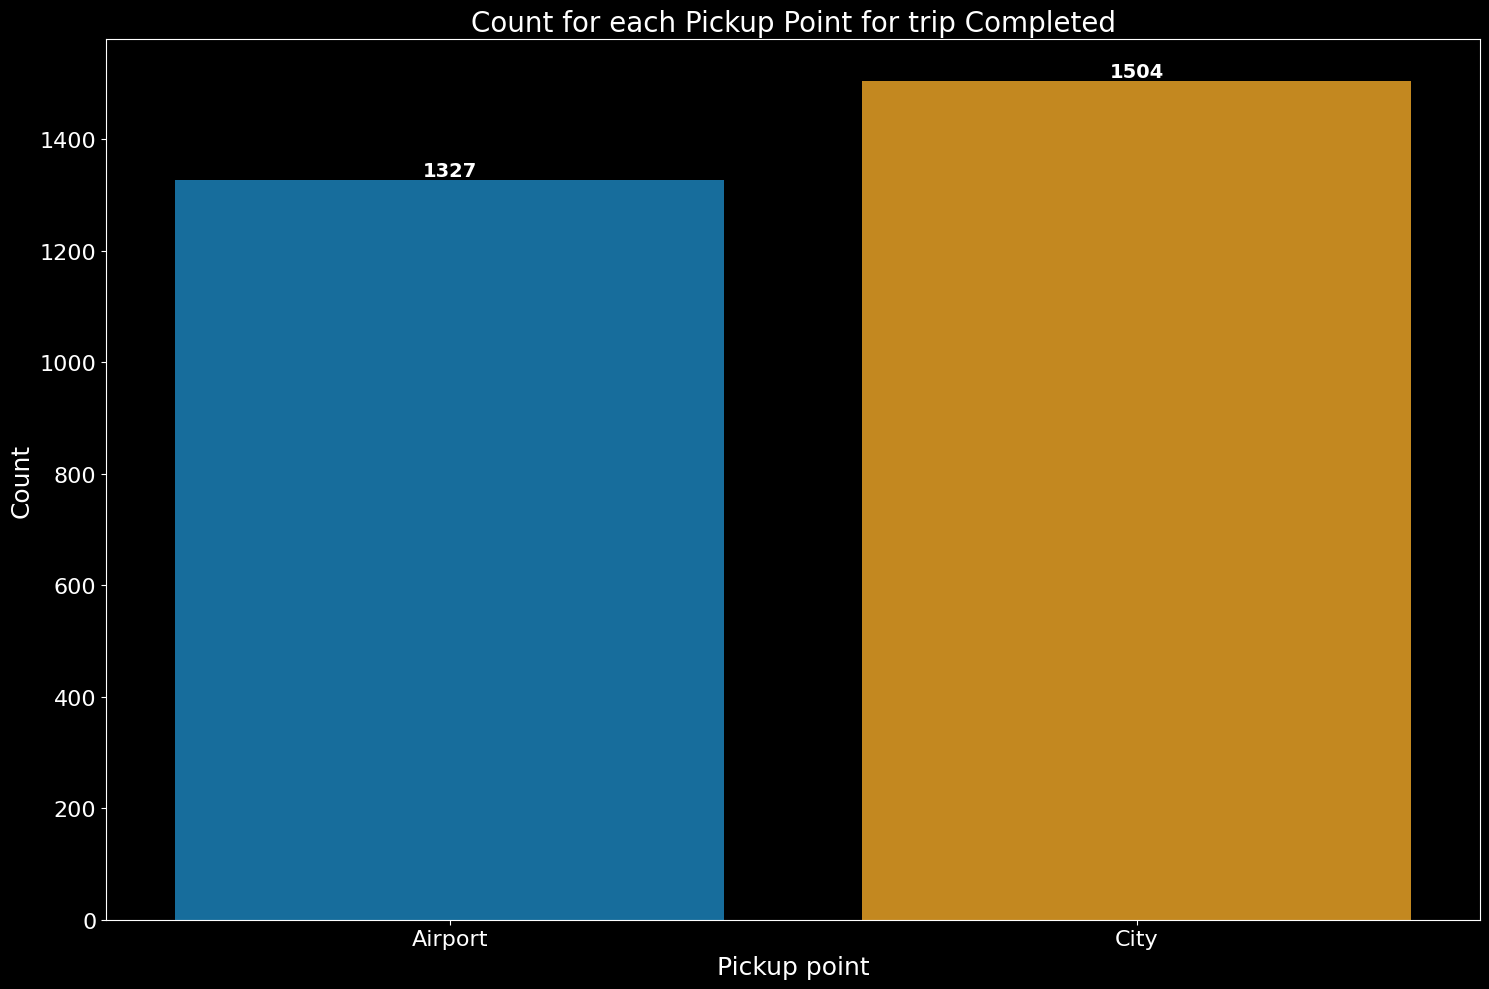

In [19]:
# Chart - 3 visualization code

plt.style.use('dark_background')
trip_c = md[md.Status=='Trip Completed'].groupby('Pickup point')['Pickup point'].count()
trip_c_1= pd.DataFrame(trip_c)
trip_c_1.rename(columns={'Pickup point': 'count'}, inplace=True)
trip_c_1.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(15,10))
# Grouping the data to plot by pickup points in the completed trips.
ax=sns.barplot(data=trip_c_1, x="Pickup point", y='count', palette="colorblind")

# labels for better readability
plt.xlabel("Pickup point", fontsize= 18)
plt.ylabel("Count", fontsize= 18)
plt.title("Count for each Pickup Point for trip Completed", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for p in ax.patches:
    count= int(p.get_height())
    x= p.get_x() + p.get_width() / 2
    y= p.get_height()
    ax.annotate(
        str(count),
        (x,y),
        ha="center",
        va="bottom",
        fontsize=14,
        color='white',
        fontweight="bold"
    )
    
plt.grid(False)
plt.tight_layout(),
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot gives clear count when using group by functions.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above ba plot:-
1. For trip completed status the highest count is for city which is 1504.
2. For trip completed in the Airport has the count as 1327.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

1. The number of completed Uber trips from the city pickup point is higher compared to the airport pickup point.
2. The city recorded approximately 1504 completed trips, while the airport recorded around 1327 completed trips.
3. This indicates that local city travel demand is slightly higher than airport travel demand.
4. The difference between city and airport trip completions is not very large, showing that both pickup points contribute significantly to overall trip demand.
5. The strong number of airport pickups suggests consistent travel activity related to flights and long-distance travel.
6. The data shows that Uber demand is well distributed between daily urban transportation and travel-related transportation.
7. From an operational perspective, slightly more drivers may be required in city areas, while maintaining sufficient driver availability at airports.
8. The balanced trip distribution suggests stable and diversified revenue sources rather than dependency on a single pickup location.
9. Further analysis can be done to study time-based demand patterns, especially for airport pickups during peak flight hours.

-------------

#### Chart - 4

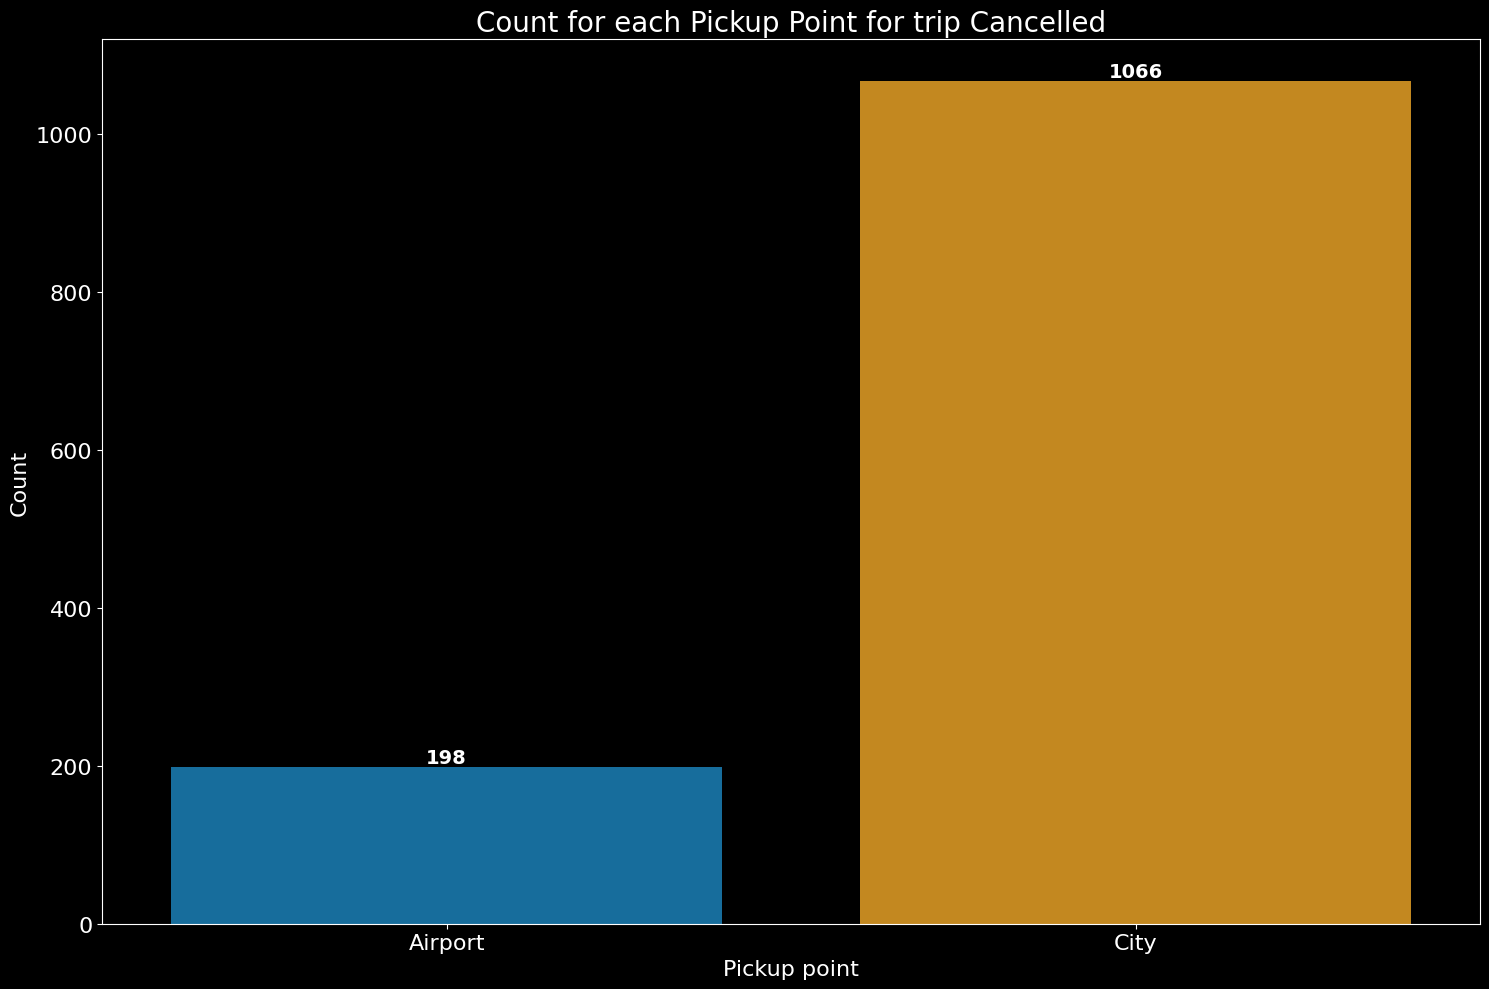

In [20]:
# Chart - 4 visualization code

plt.style.use('dark_background')
trip_cancelled = md[md.Status=='Cancelled'].groupby('Pickup point')['Pickup point'].count()
trip_cancelled_1= pd.DataFrame(trip_cancelled)
trip_cancelled_1.rename(columns={'Pickup point': 'count'}, inplace=True)
trip_cancelled_1.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(15,10))
# Grouping the data to plot by pickup points in the completed trips.
ax=sns.barplot(data=trip_cancelled_1, x="Pickup point", y='count', palette="colorblind")

# Rotate x-axis labels for better readability
plt.xlabel("Pickup point", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Count for each Pickup Point for trip Cancelled", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for p in ax.patches:
    count= int(p.get_height())
    x= p.get_x() + p.get_width() / 2
    y= p.get_height()
    ax.annotate(
        str(count),
        (x,y),
        ha="center",
        va="bottom",
        fontsize=14,
        color='white',
        fontweight="bold"
    )
    
plt.grid(False)
plt.tight_layout(),
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot gives clear count when using group by functions.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. For Cancelled Trips status the highest count is for city which is 1066.
2. For Cancelled Trips status the lowest count is for airport which is 198.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1. The number of cancelled trips is significantly higher in the City (around 1066) compared to the Airport (around 198).
2. This indicates that ride cancellations are more common in city areas, possibly due to higher traffic, longer pickup times, or higher ride demand fluctuations.
3. The large gap between city and airport cancellations suggests operational or supply-demand challenges are more prominent in city locations.
4. The relatively low airport cancellation count indicates better ride fulfillment stability at airport pickup points.
5. Uber can reduce city ride cancellations by improving driver allocation and reducing pickup waiting time through real-time demand monitoring and better driver distribution in high-demand city zones.

-------------

#### Chart - 5

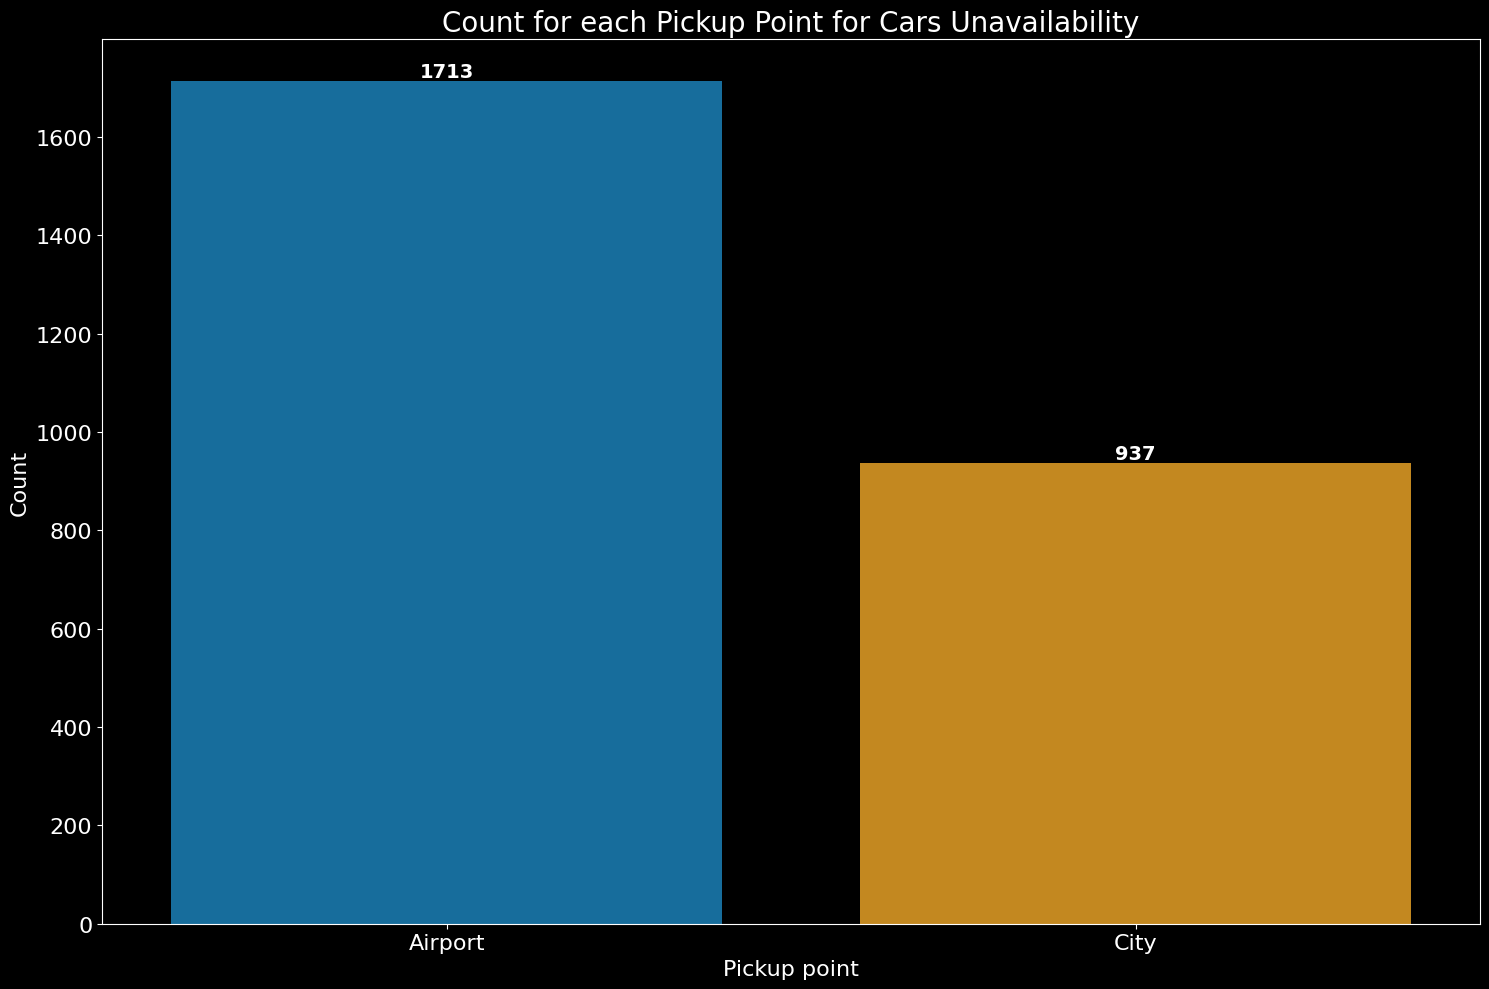

In [21]:
# Chart - 5 visualization code

plt.style.use('dark_background')
no_cars = md[md.Status=='No Cars Available'].groupby('Pickup point')['Pickup point'].count()
no_cars_1= pd.DataFrame(no_cars)
no_cars_1.rename(columns={'Pickup point': 'count'}, inplace=True)
no_cars_1.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(15,10))
# Grouping the data to plot by pickup points in the completed trips.
ax=sns.barplot(data=no_cars_1, x="Pickup point", y='count', palette="colorblind")

# Rotate x-axis labels for better readability
plt.xlabel("Pickup point", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Count for each Pickup Point for Cars Unavailability", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for p in ax.patches:
    count= int(p.get_height())
    x= p.get_x() + p.get_width() / 2
    y= p.get_height()
    ax.annotate(
        str(count),
        (x,y),
        ha="center",
        va="bottom",
        fontsize=14,
        color='white',
        fontweight="bold"
    )
    
plt.grid(False)
plt.tight_layout(),
plt.show()


##### 1. Why did you pick the specific chart?

Bar plot gives clear count when using group by functions.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar plot:-
1. For no cars availabe at the airport area, has the highest count of unavlability which is 1713.
2. For no cars available at the city reason has the 937.


##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1. The number of cases where cars were unavailable is significantly higher at the Airport (around 1713) compared to the City (around 937).
2. This indicates that car supply shortages are more frequent at airport pickup points, possibly due to sudden demand spikes during flight arrivals or limited driver presence near airports.
3. The high airport unavailability suggests a mismatch between ride demand and driver availability at airport locations.
4. The lower unavailability in the city indicates relatively better driver distribution and ride availability in urban areas.
5. Uber can reduce car unavailability at airports by using demand based on flight schedules and historical trip data to ensure more drivers are available during peak airport demand periods.

--------------

#### Chart - 6

In [22]:
# Chart - 6 visualization code

import plotly.express as px

plt.style.use('dark_background')

# Ensure clean column names
md.columns= md.columns.str.strip()

# Filter for Pickup point = 'Airport'
airport_df= md[md['Pickup point'].str.strip()== 'Airport']

# Groupby Status and count
type_count = airport_df['Status'].value_counts().reset_index()
type_count.columns = ['Status', 'Count']

# Create the treemap
fig = px.treemap(
    type_count,
    path=['Status'],
    values="Count",
    title="Count of Status for Airport",
    color="Count",
    color_continuous_scale="RdBu"
)

# Show the plot
fig.show()


##### 1. Why did you pick the specific chart?

The above treemap gives a clear details when we hover over it and helps us to compass various variables in single tree map


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above tree map:-
1. Highest count of airport status is for No cars Available which is 1713.
2. Second highest count if airport status is for Trip Completed which is 1327.
3. The lowest count of airport status is for cancelled trip which is 198.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

1. The highest airport status count is for No Cars Available, which is approximately 1713, indicating major car availability issues at the airport.
2. The second highest airport status count is for Trip Completed, which is around 1327, showing that a significant number of rides are still successfully completed at the airport.
3. The lowest airport status count is for Cancelled Trips, which is approximately 198, indicating relatively fewer cancellations compared to other status types.
4. Uber can reduce airport car unavailability by aligning driver supply with flight arrival schedules using historical airport demand data and real-time flight tracking to ensure more cars are available during peak arrival periods to increase customer engagement and profits.

---------

#### Chart - 7

In [23]:
# Chart - 7 visualization code

import plotly.express as px

plt.style.use('dark_background')

# Ensure clean column names
md.columns= md.columns.str.strip()

# Filter for Pickup point = 'Airport'
City_df= md[md['Pickup point'].str.strip()== 'City']

# Groupby Status and count
city_df_count = City_df['Status'].value_counts().reset_index()
city_df_count.columns = ['Status', 'Count']

# Create the treemap
fig = px.treemap(
    city_df_count,
    path=['Status'],
    values="Count",
    title="Count of Status for City",
    color="Count",
    color_discrete_map={'(?)': 'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'}
)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

The above treemap gives a clear details when we hover over it and helps us to compass various variables in single tree map


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above tree map:-
1. Highest count of city status is for trip Completed i.e. 1540.
2. Second highest count of city status is for cancelled trip which is 1066.
3. The lower count is for no cars available for city trip which is 937.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

1. The highest city status count is for Trip Completed (around 1540), indicating that most ride requests in the city are successfully fulfilled.
2. The second highest city status count is for Cancelled Trips (around 1066), which suggests that cancellations are a significant issue in city areas and may be linked to longer waiting times, traffic conditions, or driver-side cancellations.
3. The lowest city status count is for No Cars Available (around 937), indicating that car availability in the city is relatively better compared to other status issues.
4. Uber can reduce city trip cancellations by improving pickup time accuracy and optimizing driver allocation in high-demand city zones using real-time demand monitoring and historical trip data analysis.

----------

#### Chart - 8

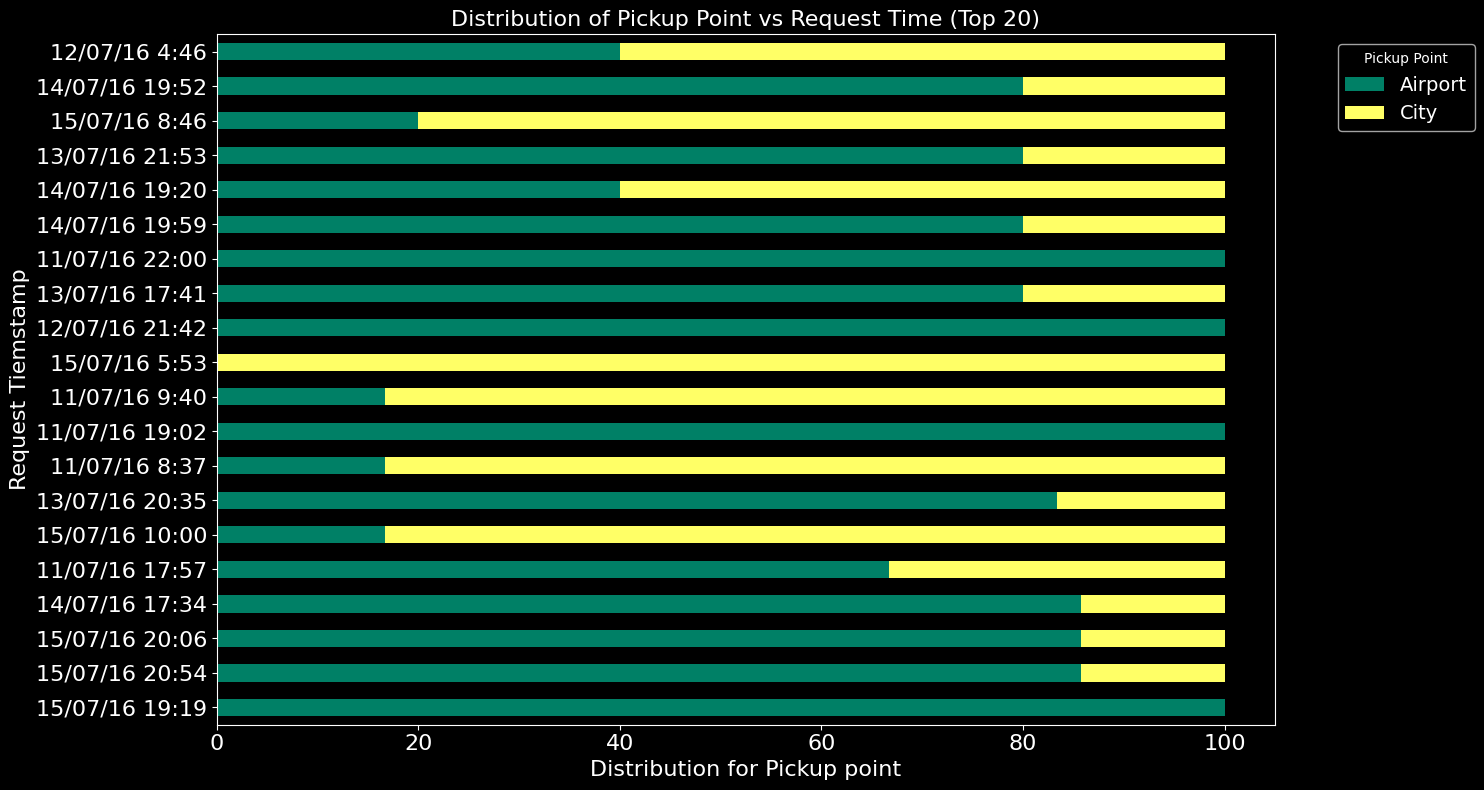

In [24]:
# Chart - 8 visualization code

P_1 = md.groupby(["Request timestamp", "Pickup point"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
P_11 = P_1.div(P_1.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all types per station)
top_P = P_1.sum(axis=1).sort_values(ascending=False).head(20).index
P_top20 = P_11.loc[top_P]

# Plot stacked bar chart for top 20 stations
fig, ax = plt.subplots(figsize=(15,8))          # Adjusted figure size
P_top20.plot(kind='barh', stacked=True, colormap='summer', ax=ax)

# Labels and title
plt.xlabel("Distribution for Pickup point", fontsize=16)
plt.ylabel("Request Tiemstamp", fontsize=16)
plt.title("Distribution of Pickup Point vs Request Time (Top 20)", fontsize=16)
plt.legend(title="Pickup Point", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The above multi bar plot is great to visualize multi variable in distribution form for a variable.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above multi bar plot:-
1. The highest distribution for airport pickup point is for the request timestamps 19:02 and 22:00 with common date as 11/7/2016.
2. The highest distribution for city pickup point is for the request timestamps 5:53, 10:00, 8.46 with common date as 15/7/2016.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

1. The data indicates that airport pickup demand appears higher during early morning and late night hours, likely due to flight departure and arrival schedules.
2. City pickup demand appears stronger during evening hours, which may be associated with office commute return time and social or personal travel.
3. Afternoon time periods show a more balanced distribution between city and airport pickups, indicating mixed travel purposes during mid-day hours.
4. The variation in pickup distribution across different time slots suggests that ride demand is highly dependent on both time of day and pickup location.
5. The pattern shows that airport demand is more event-driven, while city demand is more routine and daily activity driven.
6. Uber can improve ride availability and reduce supply-demand gaps by implementing time-based driver allocation using historical request patterns and airport flight schedule data.

------------

#### Chart - 9

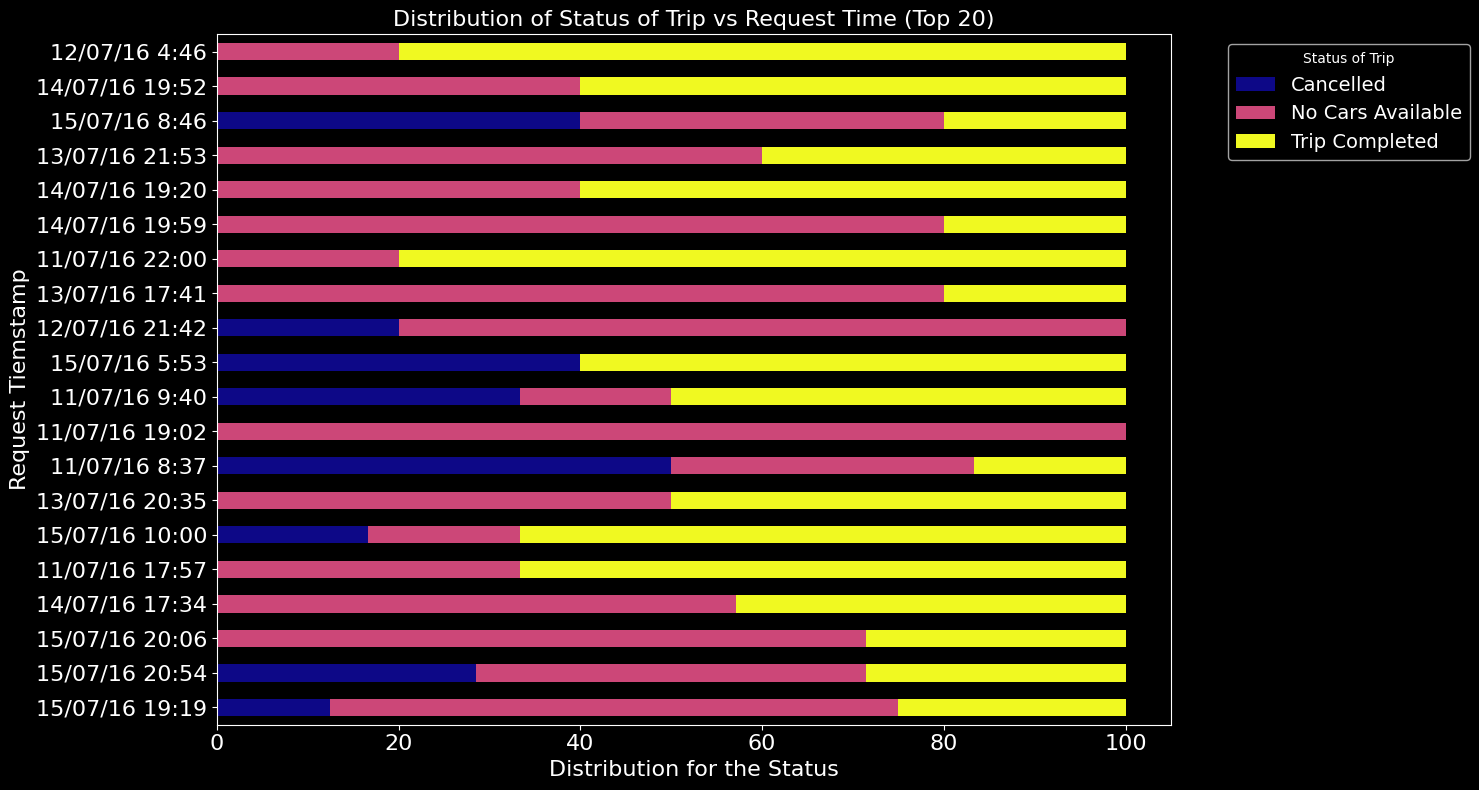

In [21]:
# Chart - 9 visualization code

S_1 = md.groupby(["Request timestamp", "Status"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
S_11 = S_1.div(S_1.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
top_S = S_1.sum(axis=1).sort_values(ascending=False).head(20).index
S_top20 = S_11.loc[top_S]

# Plot stacked bar chart for top 20 stations
fig, ax = plt.subplots(figsize=(15,8))          # Adjusted figure size
S_top20.plot(kind='barh', stacked=True, colormap='plasma', ax=ax)

# Labels and title
plt.xlabel("Distribution for the Status", fontsize=16)
plt.ylabel("Request Tiemstamp", fontsize=16)
plt.title("Distribution of Status of Trip vs Request Time (Top 20)", fontsize=16)
plt.legend(title="Status of Trip", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The above multi bar plot is great to visualize multi variable in distribution form for a variable.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above multi bar plot:-
1. The highest count for no cars available status is seen for date as 11/7/2016 but still its more like spreaded for all the dates.
2. The maximum count of trip completion is seen on the date 11/7/16 and 15/7/16.
3. The maximum cancellation appears to be on 15/07/16.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.¶

1. The chart shows that Trip Completed has the highest share during several time slots, indicating that most ride requests are successfully fulfilled across different times of the day.
2. The No Cars Available status appears significantly high during some timestamps, suggesting that demand exceeds supply during certain peak hours.
3. The Cancelled status appears lower compared to the other two statuses but still occurs during multiple time periods, indicating operational or user-side cancellation behavior.
4. The variation of status distribution across timestamps indicates that trip outcomes are highly dependent on time-based demand fluctuations.
5. The presence of high “No Cars Available” during certain time slots suggests peak demand periods where driver supply is insufficient.
6. Uber can reduce unfulfilled requests and improve trip completion rates by ensuring adequate driver availability during peak demand timestamps.

------------

#### Chart - 10

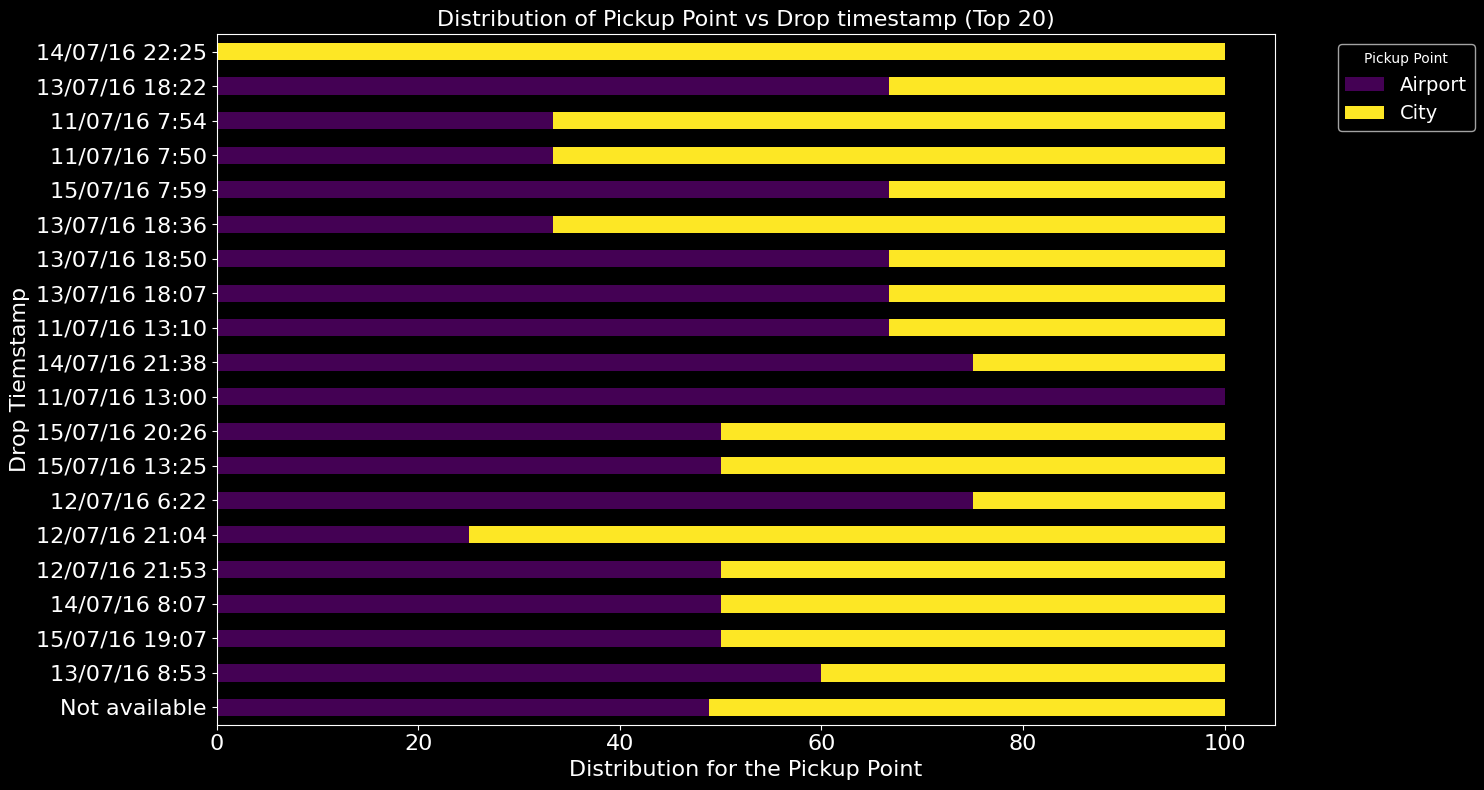

In [25]:
# Chart - 10 visualization code

Pd_1 = md.groupby(["Drop timestamp", "Pickup point"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
Pd_11 = Pd_1.div(Pd_1.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
top_Pd = Pd_1.sum(axis=1).sort_values(ascending=False).head(20).index
Pd_top20 = Pd_11.loc[top_Pd]

# Plot stacked bar chart for top 20 stations
fig, ax = plt.subplots(figsize=(15,8))          # Adjusted figure size
Pd_top20.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)

# Labels and title
plt.xlabel("Distribution for the Pickup Point", fontsize=16)
plt.ylabel("Drop Tiemstamp", fontsize=16)
plt.title("Distribution of Pickup Point vs Drop timestamp (Top 20)", fontsize=16)
plt.legend(title="Pickup Point", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The above multi bar plot is great to visualize multi variable in distribution form for a variable.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above multi bar plot:-
1. The highest count for airport pickup point is the drop timstamp 11/7/16 13:00.
2. The highest count for city pickup point is the drop timestamp 14/7/16 22:25.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

1. The chart shows that City drop trips dominate across many timestamps, indicating higher overall ride completion or drop activity within city areas.
2. Airport drops appear strong in some specific timestamps, suggesting airport travel is more time-specific and likely linked to flight schedules.
3. Several timestamps show balanced distribution between City and Airport, indicating mixed travel demand during those time periods.
4. The variation across timestamps suggests that drop location demand changes throughout the day based on travel patterns.
5. The presence of more city drops overall indicates higher dependence on Uber services for daily urban mobility.
6. Uber can improve operational efficiency by optimizing driver routing and availability based on drop location demand patterns, ensuring drivers are repositioned strategically between city and airport zones based on time-based demand trends.

-----------

#### Chart - 11

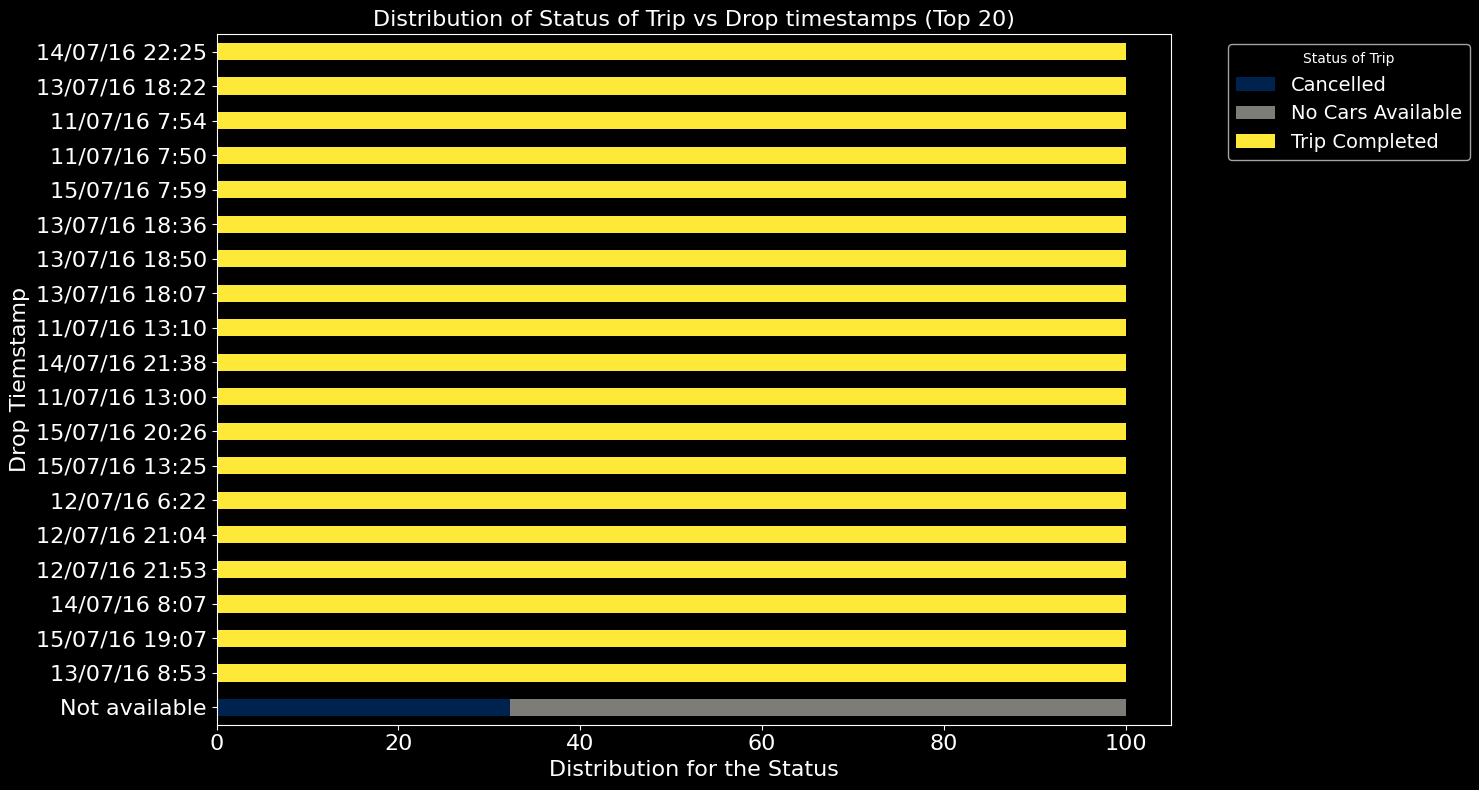

In [24]:
# Chart - 11 visualization code

Sd_1 = md.groupby(["Drop timestamp", "Status"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
Sd_11 = Sd_1.div(Sd_1.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
top_Sd = Sd_1.sum(axis=1).sort_values(ascending=False).head(20).index
Sd_top20 = Sd_11.loc[top_Sd]

# Plot stacked bar chart for top 20 stations
fig, ax = plt.subplots(figsize=(15,8))          # Adjusted figure size
Sd_top20.plot(kind='barh', stacked=True, colormap='cividis', ax=ax)

# Labels and title
plt.xlabel("Distribution for the Status", fontsize=16)
plt.ylabel("Drop Tiemstamp", fontsize=16)
plt.title("Distribution of Status of Trip vs Drop timestamps (Top 20)", fontsize=16)
plt.legend(title="Status of Trip", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The above multi bar plot is great to visualize multi variable in distribution form a variable.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-
1. Maximum count for no car available status is for the morning drop timestamp.
2. The maximum count for cancelled status is for the morning drop timestamp.
3. The highest count is for Trip Completed status.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the drop time is morning for all three status which means cancelled trips are mostly done in the morning which affects the business as most customers are travelling in the morning , the company should inform the drivers that if they cancel trips in morning than they have to face penalty as this will reduce cancellation and ultimately increase profits for the company.

-----------

#### Chart - 12

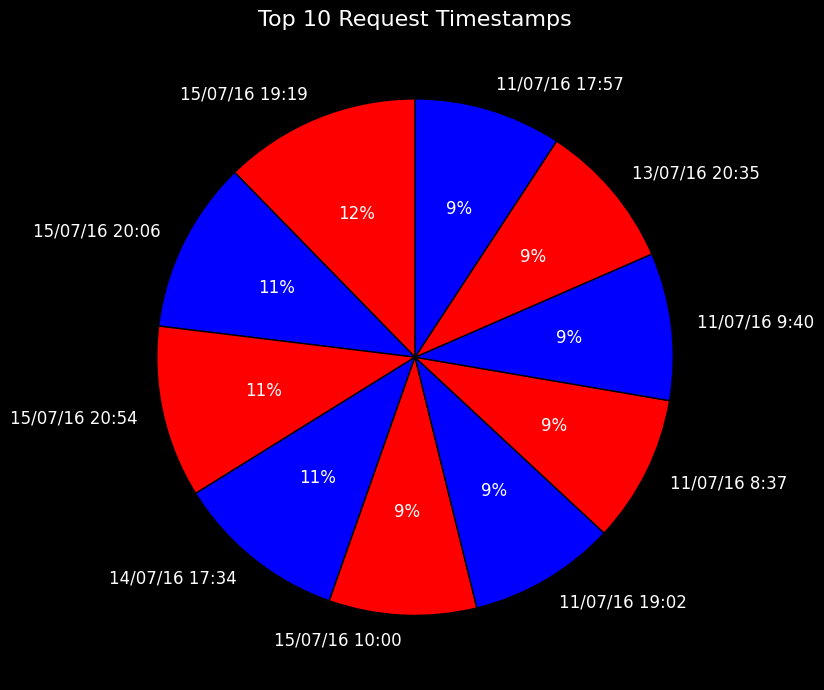

In [38]:
# Chart - 12 visualization code

co =md['Request timestamp'].value_counts().head(10)

# No conversaion to int here
plt.figure(figsize=(15, 7))
co.plot(
    kind='pie',
    labels=co.index,     # keep as strings
    autopct= lambda p: '{:.0f}%'.format(p),
    colors={'blue', 'red'},
    startangle=90,
    wedgeprops= {'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'white'}
)

plt.title('Top 10 Request Timestamps', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above pie chart gives clear distribution of request timestamps and help us to compare each of them with each other easily.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights of the above chart:-
1. The higher distribution is for request time stamps 19:19, 20:06, 20:54 and 17:34 with 11% and 12% values.
2. Rest of the distribution are of 9% each.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The above insights shows that the request time count is almost same for both morning/ afternoon and evening/ night time.

---------

#### Chart - 13

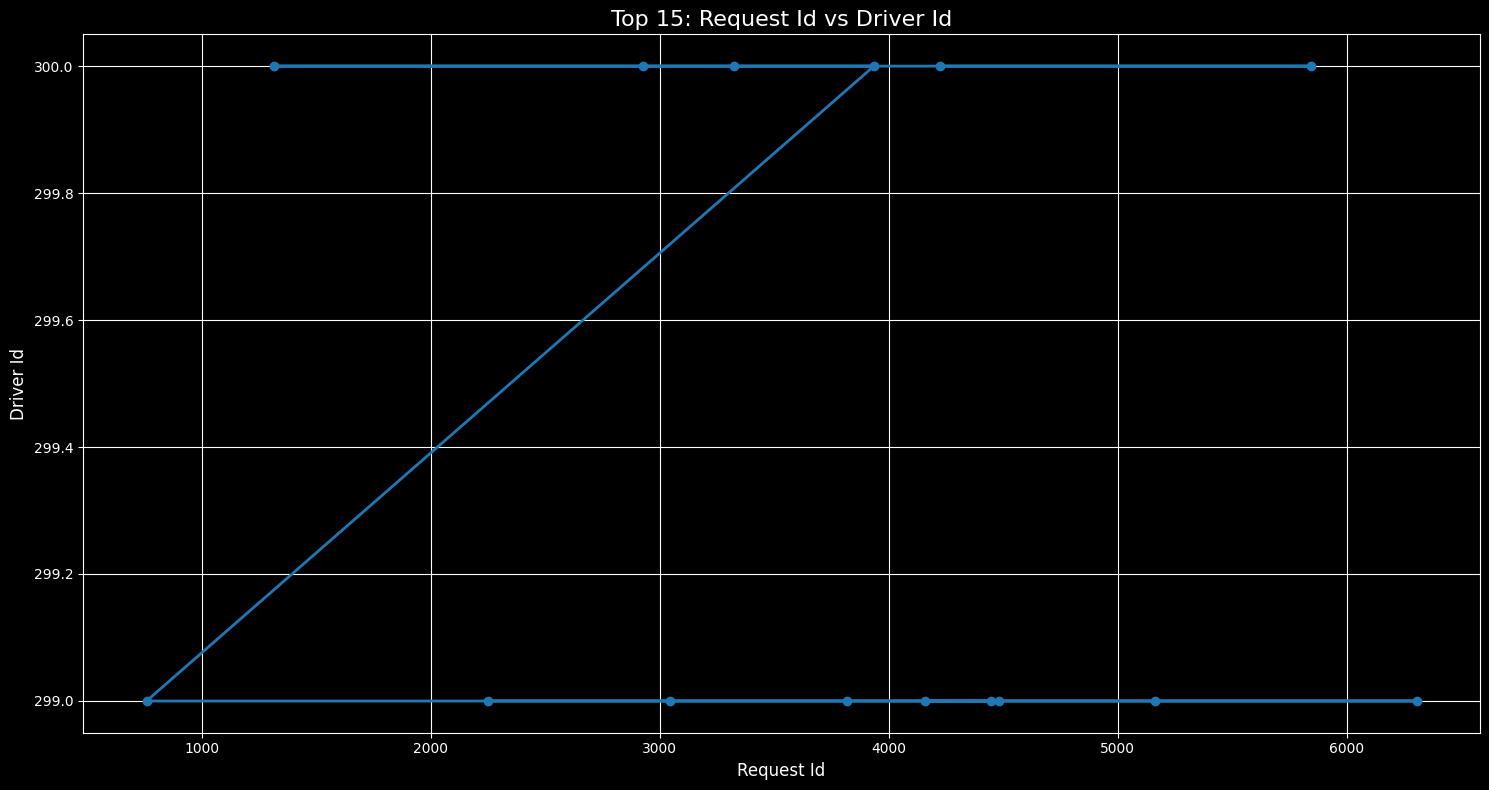

In [43]:
# Chart - 13 visualization code

plt.style.use('dark_background')

# clean column names
md.columns= md.columns.str.strip()

# optional: convert columns to numeric(in case they're strings)
md['Driver id']= pd.to_numeric(md['Driver id'], errors='coerce')
md['Request id']= pd.to_numeric(md['Request id'], errors='coerce')

# drop rows with missing values
md = md.dropna(subset=['Driver id', 'Request id'])

# sort by driver id descending and take top 15
top_rd= md[['Request id', 'Driver id']].sort_values(by='Driver id', ascending=False).head(15)

# Plot
plt.figure(figsize=(15,8))
plt.plot(top_rd['Request id'], top_rd['Driver id'], marker='o', color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel('Request Id', fontsize= 12)
plt.ylabel('Driver Id', fontsize=12)
plt.title('Top 15: Request Id vs Driver Id', fontsize= 16)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above line chart is best for analysing trends over a period of time for numerical variables.


##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-
1. For top 15 values the above line chart shows a steady Z pattern over a specific period of time.
2. Mostly the cab service request is handled by driver id's 299 and 300.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the driver id 299 and 300 are getting maximum business and also they are completing their business services successfully.

------------

#### Chart - 14 - Correlation Heatmap

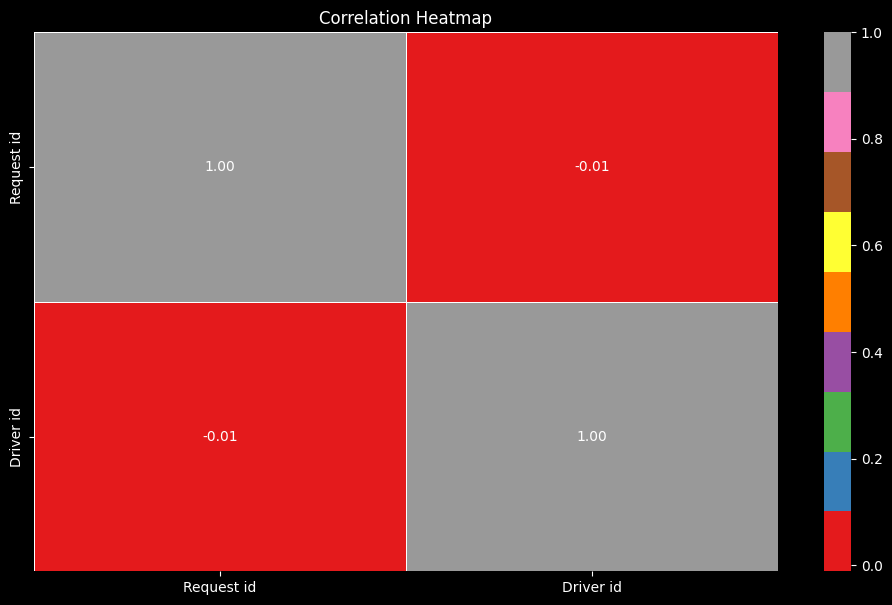

In [45]:
# Correlation Heatmap visualization code

plt.style.use('dark_background')
numerical= md.select_dtypes(include=['int64', 'float64'])

corr_matrix= numerical.corr().fillna(0)
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='Set1', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The above heatmap is good for analysing the correlation between various numerical values with each other and itself.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above chart:-
1. The numerical variable which is request id and driver has correlation as 1 with itself and very poor correlation with each other.

-----------

#### Chart - 15 - Pair Plot

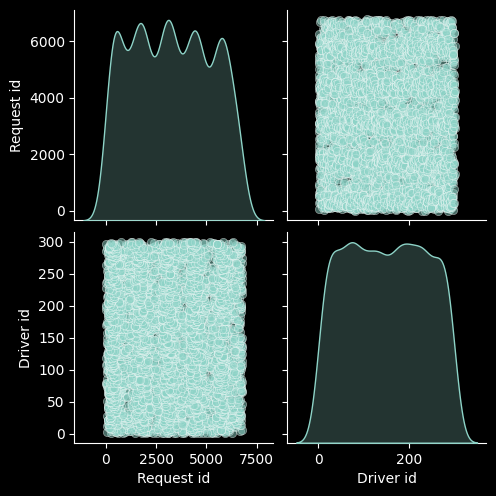

In [49]:
# Pair Plot visualization code

plt.style.use('dark_background')
numerical = md.select_dtypes(include=['int64', 'float64'])
numerical = numerical.dropna(axis=1, thresh=len(numerical) * 0.8)
sns.pairplot(numerical, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

##### 1. Why did you pick the specific chart?

The above is a pair plot which shows the possible corraltion between multiple variables.

##### 2. What is/are the insight(s) found from the chart?

Here also we can see that there is almost no correaltion seen the driver id and request id as these both are two unique and individual columns.

------------

# **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

1. From an operational perspective, slightly more drivers may be required in city areas, while maintaining sufficient driver availability at airports.
2. The balanced trip distribution suggests stable and diversified revenue sources rather than dependency on a single pickup location.
3. Uber can reduce car unavailability at airports by using demand based on flight schedules and historical trip data to ensure more drivers are available during peak airport demand periods.
4. Uber can reduce city trip cancellations by improving pickup time accuracy and optimizing driver allocation in high-demand city zones using real-time demand monitoring and historical trip data analysis.
5. Uber can reduce unfulfilled requests and improve trip completion rates by ensuring adequate driver availability during peak demand timestamps.
6. The drop time is seen in morning for all three status which means cancelled trips are mostly done in the morning which affects the business as most customers are travelling in the morning , the company should inform the drivers that if they cancel trips in morning then they have to face penalty as this will reduce cancellation and ultimately increase profits for the company.

------------

# **Conclusion**

1. The analysis revealed that trip demand and availability vary significantly based on pickup location and time of day. 
2. Airport pickups showed a higher frequency of No Cars Available during certain peak hours, indicating supply shortage.
3. City pickups showed relatively higher trip completion but also noticeable cancellation patterns. 
4. The study highlights the presence of demand-supply imbalance during peak hours, which affects service efficiency and customer experience.

---------------

## Limitation

1. The analysis is based on historical trip data and may not capture real-time factors such as traffic conditions, driver availability, or sudden demand spikes. 
2. Additionally, limited feature variables may restrict deeper behavioral pattern analysis.

---------